<a href="https://colab.research.google.com/github/tandonritika/cs-3-machine-learning-lab/blob/master/Copy_of_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class MyLinearRegression:
    def __init__(self, weight=0, bias=2.0, learning_rate=0.001,
                 iterations=2000):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, xfeature):
        predicted_set = []
        for i in range(len(xfeature)):
            predicted_value = self.weight * xfeature[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, xfeature, yfeature):
        count = len(xfeature)
        total_error = 0.0
        for i in range(count):
            total_error += (yfeature[i] - (self.weight * xfeature[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, xfeature, yfeature):
        weight_deriv = 0
        bias_deriv = 0
        count = len(xfeature)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * xfeature[i] * (yfeature[i] -
                                                (self.weight * xfeature[i] +
                                                 self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (yfeature[i] - (self.weight * xfeature[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, xfeature, yfeature):
        for i in range(self.iterations):
            self.update_weights(xfeature, yfeature)
            # Calculating cost
            self.cost = self.cost_function(xfeature, yfeature)
            self.cost_trend.append(self.cost)
            #if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".
            format(i, self.weight, self.bias, self.cost))

# New Section

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


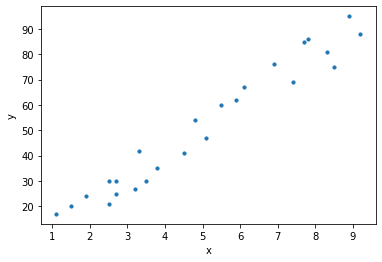

In [15]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, :-1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [0.667]	 Bias: [2.10325]	 Cost: 1424.7503035868751
Iteration: 1	 Weight: [1.28736962]	 Bias: [2.19925665]	 Cost: 1234.600511499233
Iteration: 2	 Weight: [1.86436908]	 Bias: [2.28852639]	 Cost: 1070.1103500235536
Iteration: 3	 Weight: [2.40103067]	 Bias: [2.37153024]	 Cost: 927.8171971228396
Iteration: 4	 Weight: [2.90017465]	 Bias: [2.44870631]	 Cost: 804.7256920224881
Iteration: 5	 Weight: [3.36442413]	 Bias: [2.52046205]	 Cost: 698.2446809453392
Iteration: 6	 Weight: [3.79621878]	 Bias: [2.58717645]	 Cost: 606.1326716632067
Iteration: 7	 Weight: [4.19782774]	 Bias: [2.64920199]	 Cost: 526.4506486482169
Iteration: 8	 Weight: [4.57136148]	 Bias: [2.7068665]	 Cost: 457.52125555263916
Iteration: 9	 Weight: [4.9187829]	 Bias: [2.76047491]	 Cost: 397.8934857822362
Iteration: 10	 Weight: [5.24191769]	 Bias: [2.8103108]	 Cost: 346.31213787706184
Iteration: 11	 Weight: [5.54246388]	 Bias: [2.85663795]	 Cost: 301.6913927158878
Iteration: 12	 Weight: [5.82200077]	 Bias: [2

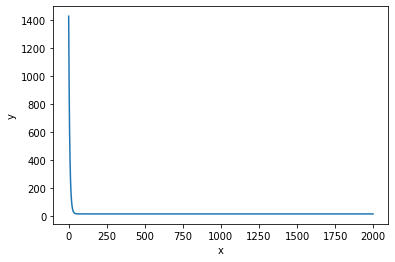

In [20]:
x=[int(x) for x in range(2000)]
y=regressor.cost_trend
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

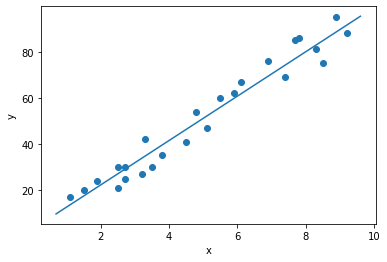

In [21]:
w = regressor.weight
b = regressor.bias
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()